In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [3]:
concrete=pd.read_csv("concrete.csv")

Univariate analysis

In [4]:
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [5]:
concrete.shape

(1030, 9)

In [6]:
concrete.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [7]:
# let's count null in each column.
concrete.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [8]:
# Let's count zeros in each column
(concrete==0).sum()

cement            0
slag            471
ash             566
water             0
superplastic    379
coarseagg         0
fineagg           0
age               0
strength          0
dtype: int64

In [9]:
concrete.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


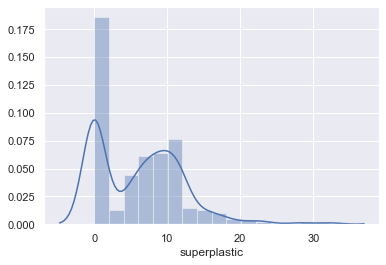

In [10]:
# superplastic and age may have outliers, check them
sns.distplot(concrete['superplastic'])

In [11]:
concrete[concrete['superplastic']>25]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
44,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2
156,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4
232,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3
292,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7
538,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9
744,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.9
816,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.9
838,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.8
955,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.2
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.3


No concrete evidence that these outliers are a mistake. Let's look at age now.

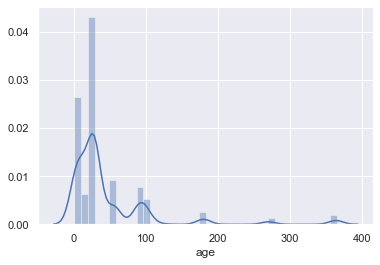

In [12]:
sns.distplot(concrete['age'])

The plot doesn't hint at mistaken outliers. Let's accept the data as is and move on.

Bivariate analysis

In [13]:
concrete.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


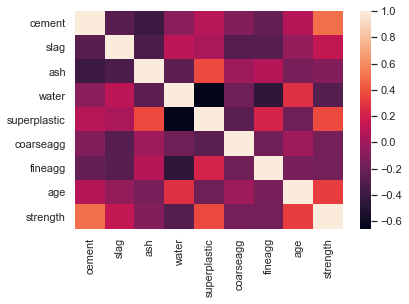

In [14]:
sns.heatmap(concrete.corr())

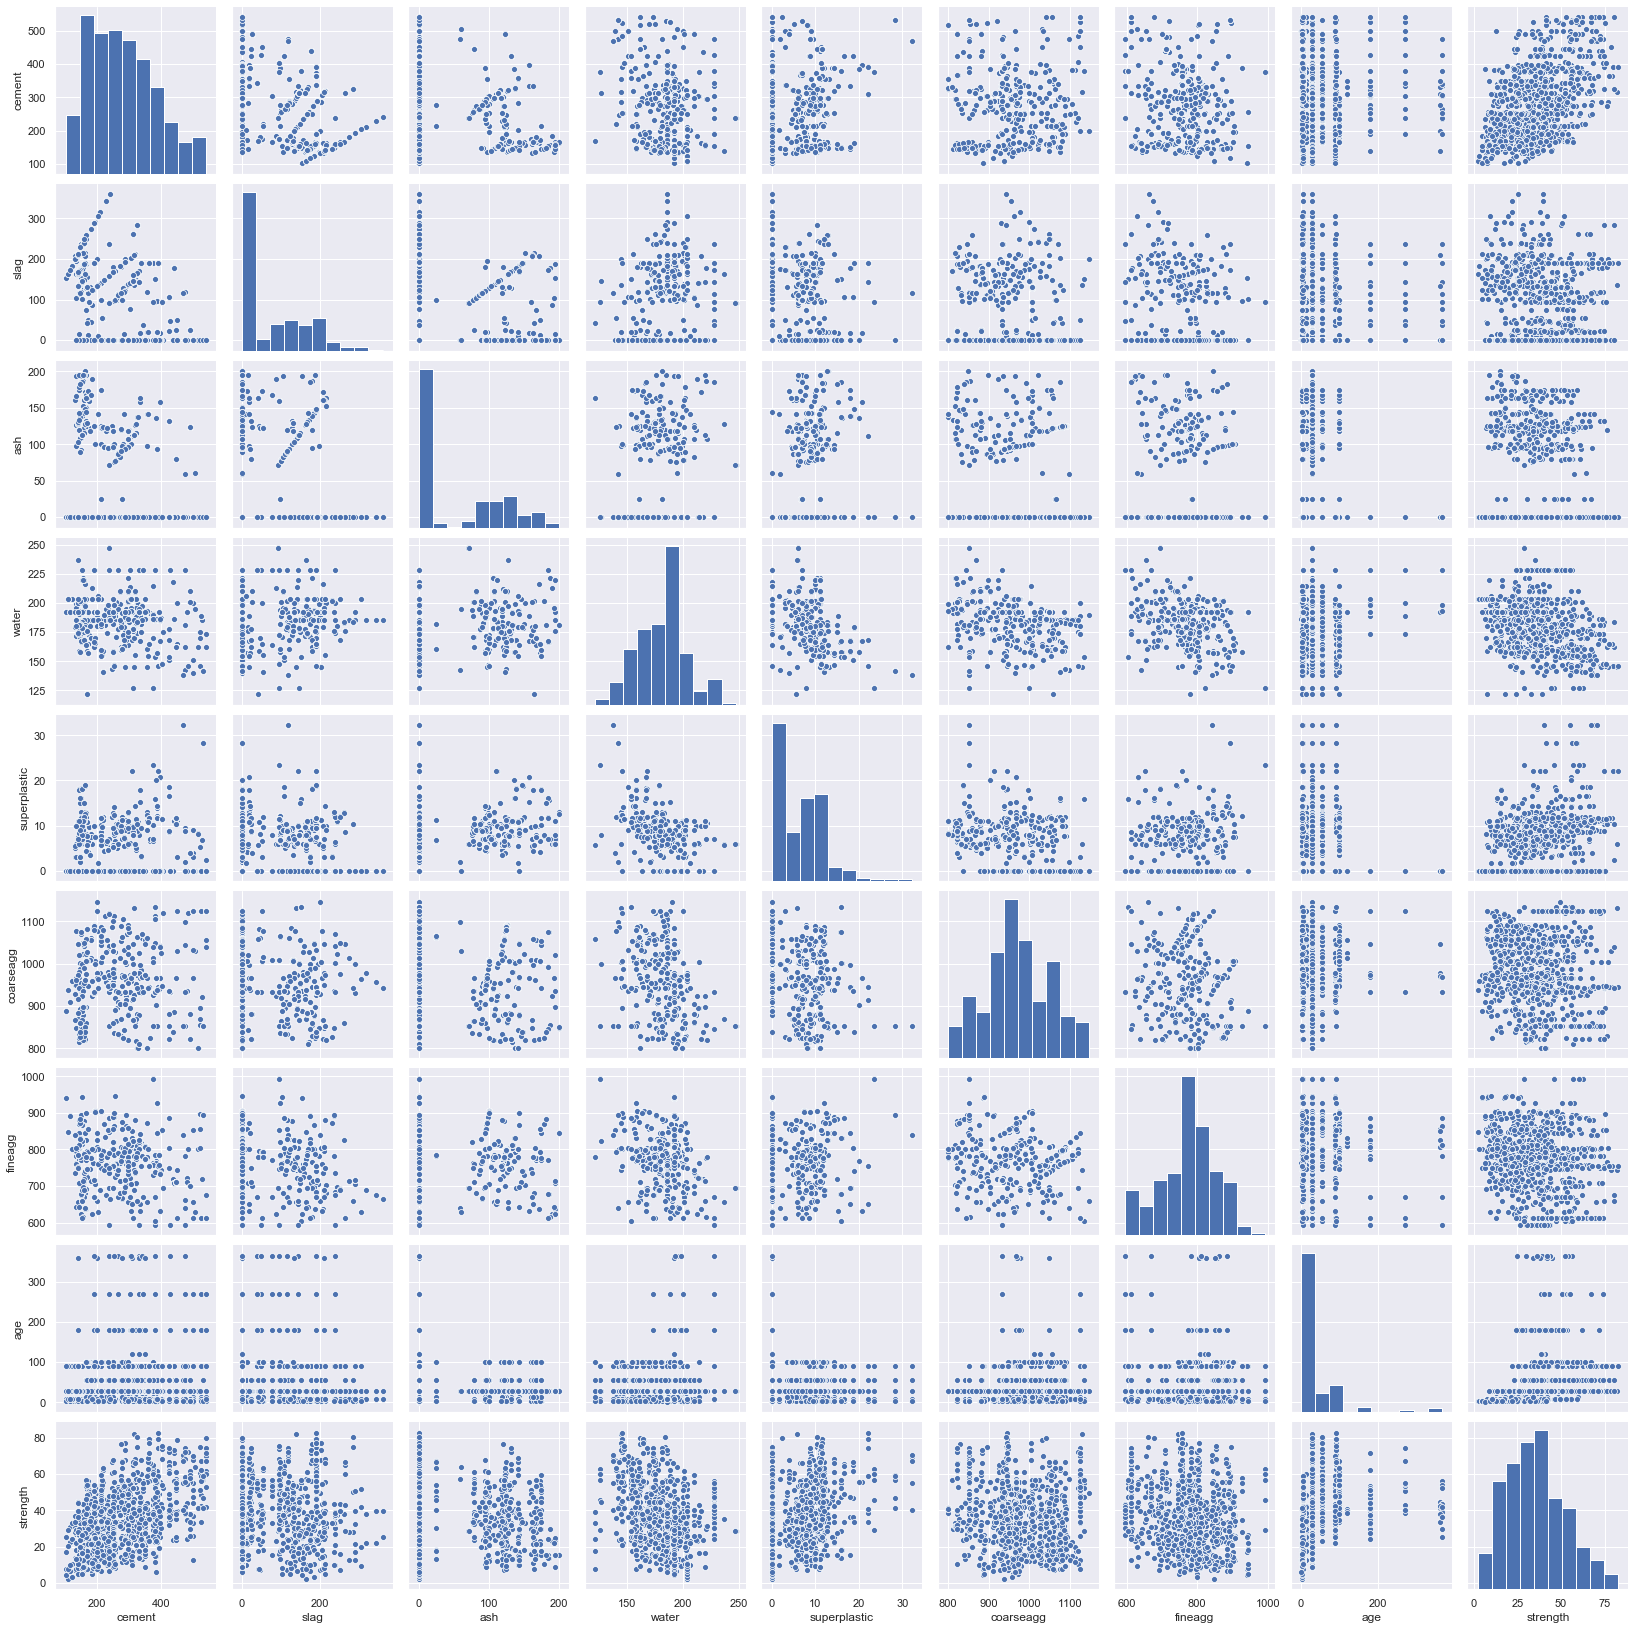

In [15]:
sns.pairplot(concrete)

Findings:
superplastic and water are strongly related. As are fineagg and water. Some dependency found in the rest of the variables as well.
The strength seems to have a strong dependency on cement, superplastic and age.

Feature engineering... cement has a range of 102-540 and has a strong impact on the strength with range 2-82.
sqrt(cement) might have a stronger relationship. Let's try it.

In [16]:
from math import sqrt as sqrt
concrete['cement_sqrt']=concrete['cement'].apply(sqrt)

In [17]:
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,cement_sqrt
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,11.886968
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,12.996153
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,15.811388
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,16.309506
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,12.441865


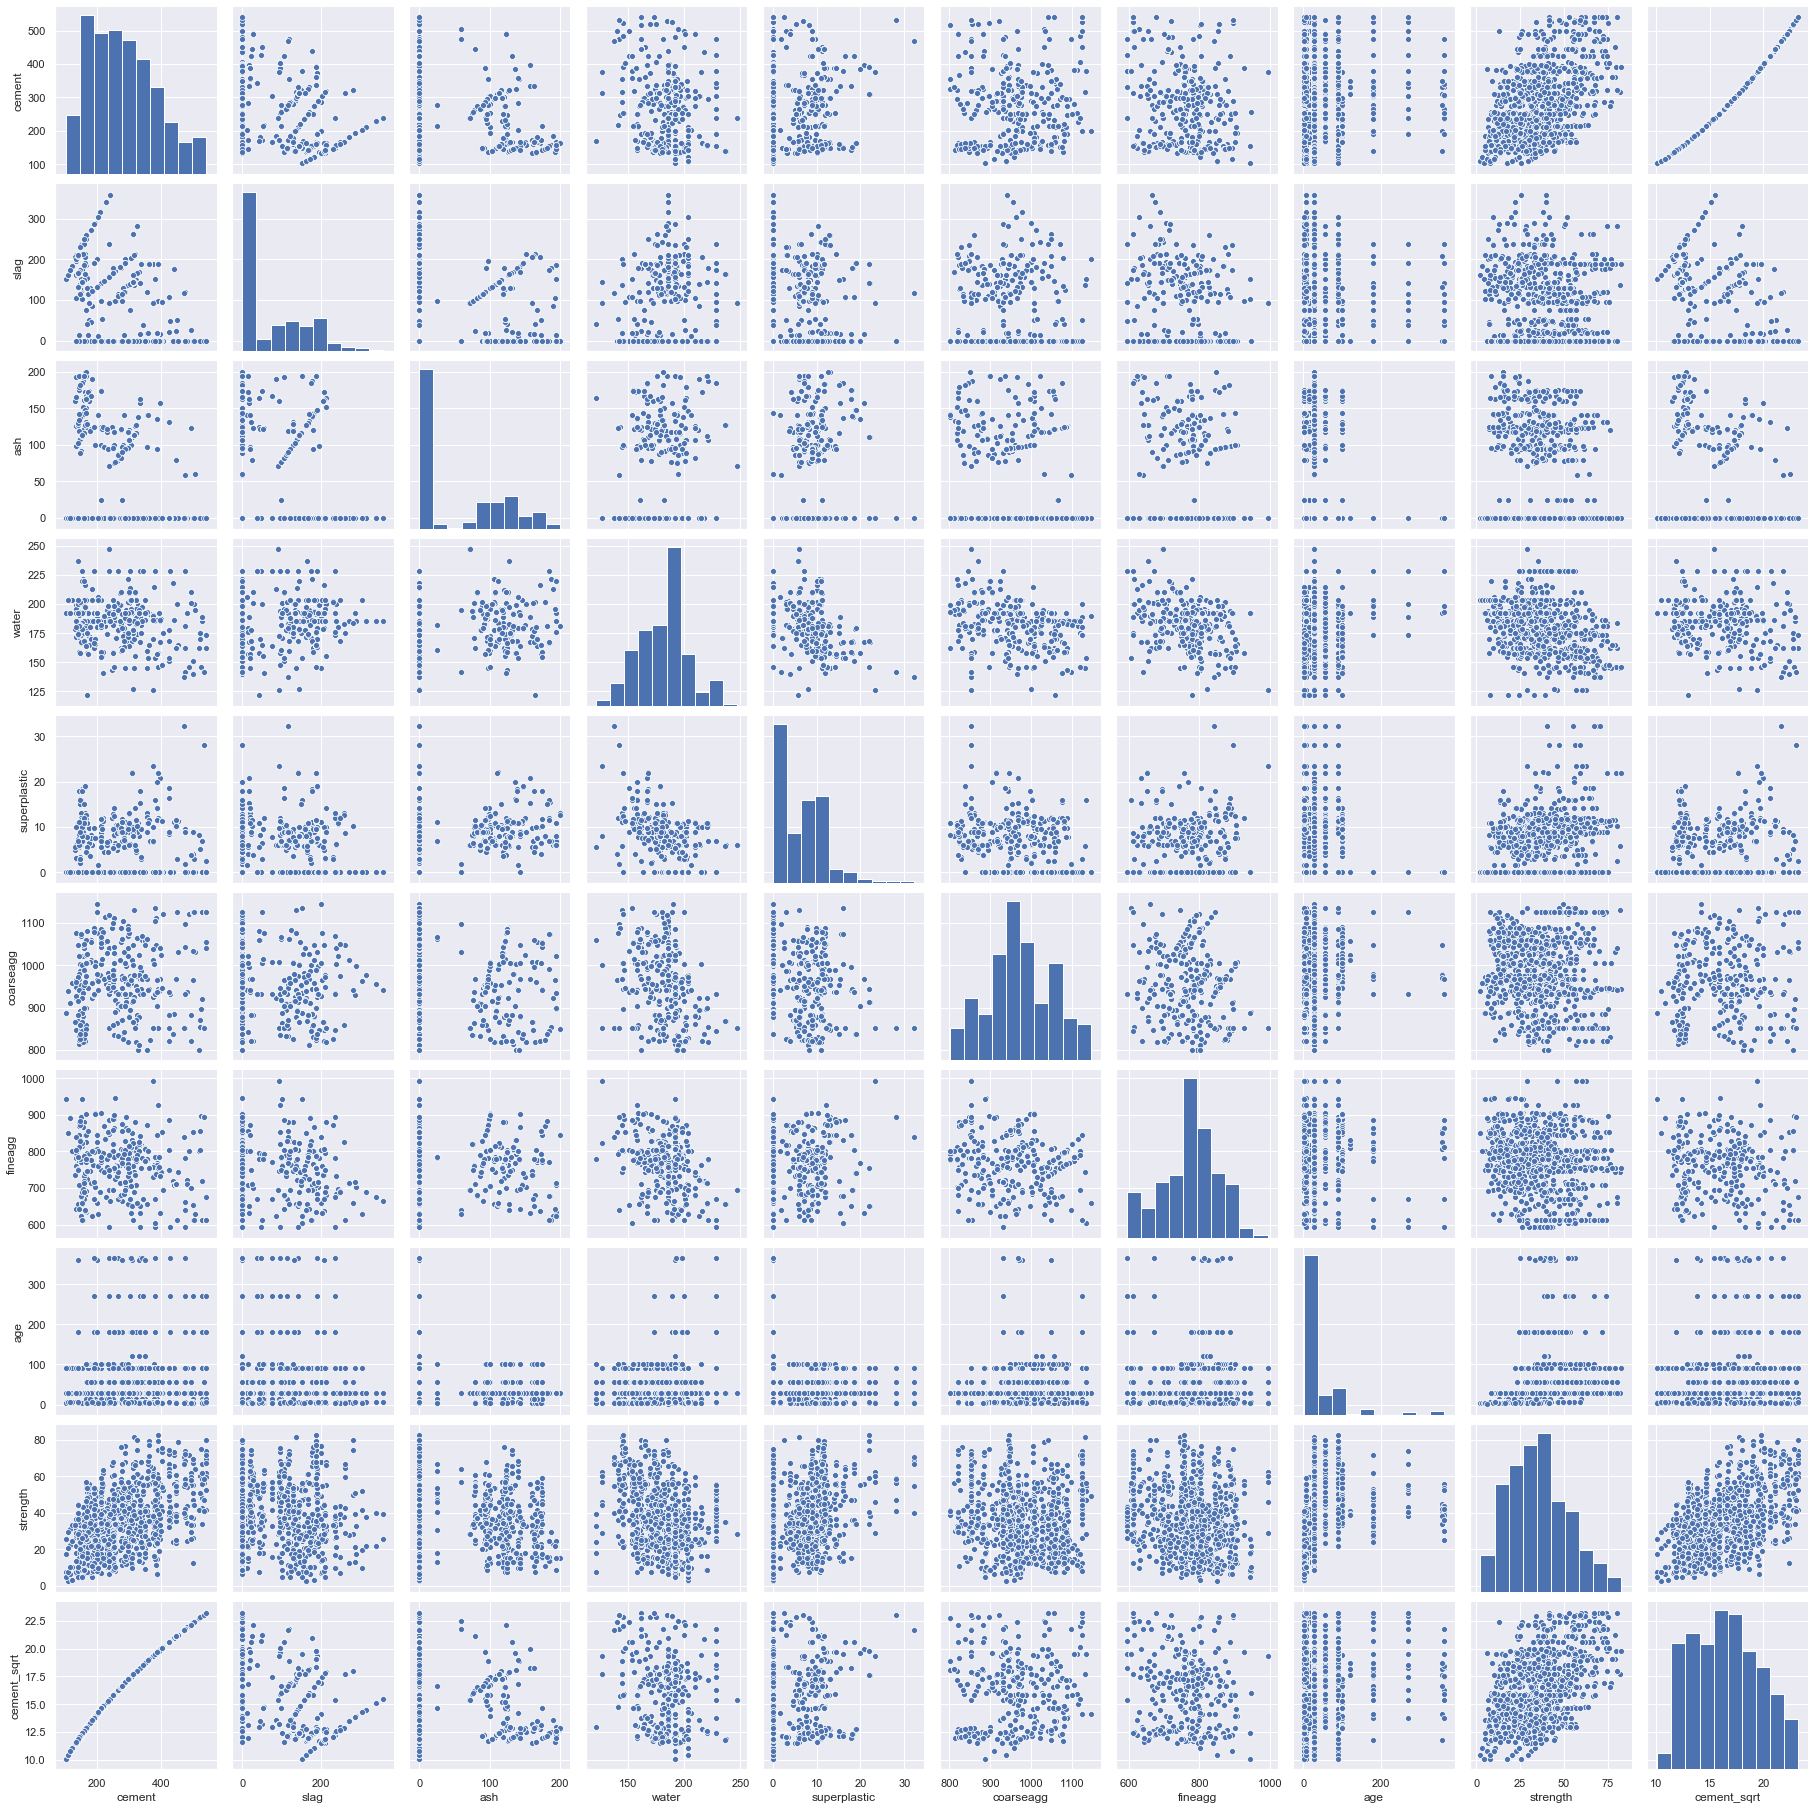

In [18]:
sns.pairplot(concrete)

In [19]:
#'cement' is no longer needed.
concrete.drop(columns=['cement'], inplace=True)

In [20]:
from sklearn.model_selection import train_test_split
X=concrete.drop(columns=['strength'])
Y=concrete['strength']
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 42 )


Model creation

In [21]:
# Setup different models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7)
models = { 'linear_reg': LinearRegression(), 'bagging': BaggingRegressor(), 'gradient': GradientBoostingRegressor(), 'rf': RandomForestRegressor() }
models_results = dict()
metrics=["explained_variance", "max_error", "neg_mean_absolute_error", "neg_mean_squared_error", "neg_root_mean_squared_error", "neg_mean_squared_log_error", "neg_median_absolute_error", "r2", "neg_mean_poisson_deviance", "neg_mean_gamma_deviance"]
for name, model in models.items():
    models_results[name]=dict()
    for met in metrics:
        results = model_selection.cross_val_score(model, X, Y, scoring = met,  cv=kfold)
        models_results[name][met]=results.mean()

models_df = pd.DataFrame(models_results)
models_df.head(15)

,linear_reg,bagging,gradient,rf
explained_variance,0.598468,0.905012,0.906469,0.918875
max_error,-28.143744,-19.861300,-18.860690,-19.538532
neg_mean_absolute_error,-8.167147,-3.542307,-3.695701,-3.211583
neg_mean_squared_error,-108.213660,-25.639121,-25.562958,-22.563307
neg_root_mean_squared_error,-10.366494,-4.995505,-5.015489,-4.647597
neg_mean_squared_log_error,-0.108900,-0.026498,-0.025316,-0.023610
neg_median_absolute_error,-6.345911,-2.372521,-2.690171,-2.211107
r2,0.596140,0.905715,0.905903,0.918954
neg_mean_poisson_deviance,-3.048031,-0.708839,-0.716719,-0.632701
neg_mean_gamma_deviance,-0.106171,-0.028162,-0.027031,-0.024977


In [22]:
# We will pick the 2 high performing models - gradient boosting and randomforest to tweak and see if we can improve the performance
from sklearn.model_selection import GridSearchCV
gb=GradientBoostingRegressor()
param_grid = {'max_features': range(2,8), 'max_depth':[3, 4, 5], 'min_samples_leaf': [2, 3, 4] }
gb_gs = GridSearchCV(gb,param_grid,cv=10)
gb_gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [3, 4, 5], 'max_features': range(2, 8),
                         'min_samples_leaf': [2, 3, 4]})

In [23]:
gb_gs.best_params_

{'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 2}

In [24]:
# Let's do the same for randomforest
rf=RandomForestRegressor()
param_grid = {'max_features': range(2,8),  'min_samples_leaf': [1, 2, 3] }
rf_gs=GridSearchCV(rf, param_grid, cv=10)
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_features': range(2, 8),
                         'min_samples_leaf': [1, 2, 3]})

In [25]:
rf_gs.best_params_

{'max_features': 4, 'min_samples_leaf': 1}

In [26]:
best_models = {'gradient_best': GradientBoostingRegressor(max_depth = 5, max_features=3, min_samples_leaf=4), 'rf_best': RandomForestRegressor(max_features=4, min_samples_leaf=1)}
models_results = dict()
metrics=["explained_variance", "max_error", "neg_mean_absolute_error", "neg_mean_squared_error", "neg_root_mean_squared_error", "neg_mean_squared_log_error", "neg_median_absolute_error", "r2", "neg_mean_poisson_deviance", "neg_mean_gamma_deviance"]
for name, model in best_models.items():
    models_results[name]=dict()
    for met in metrics:
        results = model_selection.cross_val_score(model, X, Y, scoring = met,  cv=kfold)
        models_results[name][met]=results.mean()

models_df = pd.DataFrame(models_results)
models_df.head(15)

,gradient_best,rf_best
explained_variance,0.931295,0.920663
max_error,-17.741817,-19.335000
neg_mean_absolute_error,-2.920854,-3.179695
neg_mean_squared_error,-18.750327,-21.766687
neg_root_mean_squared_error,-4.303512,-4.539959
neg_mean_squared_log_error,-0.019272,-0.023519
neg_median_absolute_error,-2.092188,-2.318551
r2,0.928618,0.920864
neg_mean_poisson_deviance,-0.536521,-0.620064
neg_mean_gamma_deviance,-0.020048,-0.024560


Conclusions: so we were able to fine tune the model to improve gradient boosting's r2_score from 90.6% to 92.9% and random forest's r2 score from 91.9% to 92.9%